In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
def get_df(table_name):
    try:
        conn = sqlite3.connect('/Users/tristannisbet/Documents/travel_app/places.db')

    except Exception as e:
        print('Error durring connection: ', str(e))
    
    sql = """select * from {}""".format(table_name)
    df = pd.read_sql_query(sql, conn)

    return df

In [3]:
one = get_df('restaurants_one')
two = get_df('restaurants_two')
three = get_df('restaurants_three')
four = get_df('restaurants_four')
top_rest = get_df('restaurants')


In [4]:
all_price = pd.concat([one, two, three, four, top_rest], axis =0)

In [5]:
all_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25533 entries, 0 to 8185
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             25533 non-null  object 
 1   city                25533 non-null  object 
 2   name                25533 non-null  object 
 3   address             25533 non-null  object 
 4   price_level         22748 non-null  float64
 5   rating              25533 non-null  float64
 6   user_ratings_total  25533 non-null  int64  
 7   types               25533 non-null  object 
 8   latitude            25381 non-null  float64
 9   longitude           25381 non-null  float64
 10  place_id            25533 non-null  object 
 11  id                  25533 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 2.5+ MB


In [8]:
all_price

,country,city,name,address,price_level,rating,user_ratings_total,types,latitude,longitude,place_id,id
0,Hong Kong,Hong Kong,One Dim Sum,"G/F 209A-209B Tung Choi Street Prince Edward, ...",1.0,4.3,3698,"['restaurant', 'food', 'point_of_interest', 'e...",22.325450,114.169199,ChIJZTOZi8kABDQR6mCupQnajEI,1
1,Hong Kong,Hong Kong,Moti Palace Indian Restaurant,"Chungking Mansion, Shop No. 96-97, 1/F, Chungk...",1.0,4.4,162,"['restaurant', 'food', 'point_of_interest', 'e...",22.296380,114.172811,ChIJB6PtEPIABDQRAED5_CwXw9w,1
2,Hong Kong,Hong Kong,Fete Up,"Lower GF 182 Wellington Street, Central, Hong ...",1.0,4.8,71,"['meal_takeaway', 'restaurant', 'food', 'point...",22.284689,114.153056,ChIJdd55iXwABDQRzMUhIIfzfq4,1
3,Hong Kong,Hong Kong,Mr. Wong's,"10號 Shamchun St, Mong Kok, Hong Kong",1.0,4.6,713,"['restaurant', 'food', 'point_of_interest', 'e...",22.318595,114.166697,ChIJdVAihMYABDQRv8A-SDlvBi8,1
4,Hong Kong,Hong Kong,Junels Restobar Filipino Bar and Restaurant,"7 ON NING LANE SHOP 1G ON THE BASEMENT, Sai Yi...",1.0,4.6,69,"['restaurant', 'food', 'point_of_interest', 'e...",22.286712,114.138641,ChIJ1cefQYH_AzQRlBF9MTtg59U,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8181,Mexico,Cancun,TACO y TEQUILA,"Blvd. Kukulcan 25, La Isla, Zona Hotelera, 775...",2.0,4.3,849,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,ChIJS-ivY18oTI8RisyiIBXepcQ,140
8182,Mexico,Cancun,Ember Kosher,"Blvd. Kukulcan 9, Punta Cancun, Zona Hotelera,...",NaN,4.8,362,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,ChIJiY1KsWwpTI8RHoFWLxW8m7Y,140
8183,Mexico,Cancun,Gopals,"Av Coba 81, 26, 77505 Cancún, Q.R., Mexico",1.0,4.7,177,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,ChIJWVTYofcrTI8R-X9Z4Ez6a94,140
8184,Mexico,Cancun,Tacun,"Blvd. Kukulcan KM. 11.5, El Rey, Zona Hotelera...",1.0,4.2,591,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,ChIJEbZ484soTI8RbNTpOYvbNZY,140


In [9]:
top_rest['id'] = pd.to_numeric(top_rest.id)
all_price['id'] = pd.to_numeric(all_price.id)

In [10]:
top_rest.isnull().sum()

country                  0
city                     0
name                     0
address                  0
price_level           2785
rating                   0
user_ratings_total       0
types                    0
latitude                60
longitude               60
place_id                 0
id                       0
dtype: int64

In [ ]:
top_rest.groupby('id').id.nunique()

In [ ]:
top_rest[top_rest.city == 'Beirut'].price_level.isnull().sum()

In [11]:
# Count and list the amount of null values
null_count = top_rest.price_level.isnull().groupby([top_rest['city']]).sum().astype(int).reset_index(name='count')
null_count

,city,count
0,Abu Dhabi,32
1,Accra,15
2,Agra,40
3,Amman,22
4,Amsterdam,12
...,...,...
133,Washington D.C.,1
134,Xi'an,55
135,Xiamen,40
136,Zhuhai,30


In [ ]:
null_count.sort_values('count')

In [ ]:
null_count[null_count['count'] > 45]

In [ ]:
# all 5 tables together
all_price.groupby('city')['price_level'].mean()

In [ ]:
# One table Best restaurant query
top_rest.groupby('city')['price_level'].mean()

In [ ]:
# 4 Tables price 1-4
price.groupby('city')['price_level'].mean()

In [12]:
def graph_all(df):
    i = 1
    k = 5
    while k <= 140:
        sample = df[(df.id >= i) & (df.id <= k)]
        g = sns.FacetGrid(sample, col = "city")
        g.map(plt.hist, "price_level")
        plt.show()
        i += 5
        k += 5

In [ ]:
graph_all(all_food)

In [ ]:
graph_all(all_price)

In [ ]:
top_rest

In [18]:
user2 = all_price[all_price['city'].isin(['Sydney', 'London', 'Dublin', 'Prague', 'Rome'])]


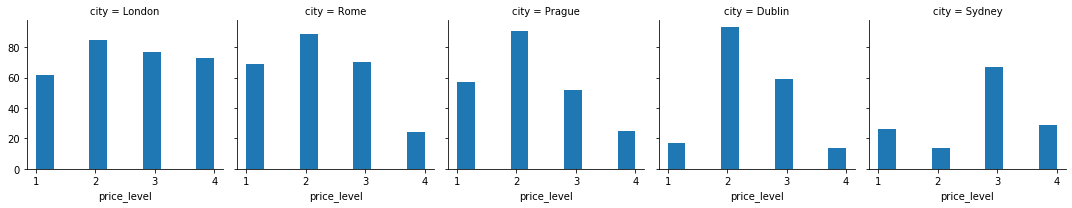

In [19]:
g = sns.FacetGrid(user2, col = "city")
g.map(plt.hist, "price_level")
plt.show()

In [ ]:
plt.hist(all_price.price_level)

In [20]:
def to_city(df):
    city_df = df.groupby(['country', 'city', 'id', 'price_level'])['name'].count().to_frame()
    price_level = city_df.pivot_table(index=['country', 'city', 'id'], columns='price_level', values='name', aggfunc='first')
    price_level['avg_price'] = df.groupby(['country', 'city', 'id'])['price_level'].mean()

    
    return price_level

In [42]:
food = to_city(all_price)
food

price_level                      1.0   2.0   3.0   4.0  avg_price
country   city             id                                    
Argentina Buenos Aires     85    6.0  80.0  68.0  31.0   2.670270
Australia Melbourne        73   18.0  84.0  79.0  19.0   2.495000
          Sydney           55   26.0  14.0  67.0  29.0   2.727941
Austria   Vienna           37   65.0  86.0  78.0  19.0   2.205645
Belgium   Brussels         60   10.0  89.0  44.0  18.0   2.434783
...                              ...   ...   ...   ...        ...
Uruguay   Montevideo       129   7.0  93.0  27.0   5.0   2.227273
Vietnam   Da Nang          90   18.0  78.0   8.0   NaN   1.903846
          Ha Long          48   15.0  23.0   1.0   NaN   1.641026
          Hanoi            52   22.0  81.0  15.0   1.0   1.957983
          Ho Chi Minh City 31   18.0  84.0  68.0   4.0   2.333333

[137 rows x 5 columns]

In [43]:
#food.reset_index(inplace=True)
food.drop(columns = ['avg_price'], inplace=True)


In [25]:
food.set_index('id', inplace=True)

In [44]:
food

price_level                      1.0   2.0   3.0   4.0
country   city             id                         
Argentina Buenos Aires     85    6.0  80.0  68.0  31.0
Australia Melbourne        73   18.0  84.0  79.0  19.0
          Sydney           55   26.0  14.0  67.0  29.0
Austria   Vienna           37   65.0  86.0  78.0  19.0
Belgium   Brussels         60   10.0  89.0  44.0  18.0
...                              ...   ...   ...   ...
Uruguay   Montevideo       129   7.0  93.0  27.0   5.0
Vietnam   Da Nang          90   18.0  78.0   8.0   NaN
          Ha Long          48   15.0  23.0   1.0   NaN
          Hanoi            52   22.0  81.0  15.0   1.0
          Ho Chi Minh City 31   18.0  84.0  68.0   4.0

[137 rows x 4 columns]

In [45]:
food.fillna(0, inplace=True)

In [46]:
normalized = preprocessing.normalize(food)
normalized_city = pd.DataFrame(normalized)
normalized_city
#Concat to food

,0,1,2,3
0,0.054724,0.729659,0.620210,0.282743
1,0.152226,0.710386,0.668101,0.160683
2,0.330147,0.177772,0.850764,0.368241
3,0.483596,0.639834,0.580315,0.141359
4,0.098624,0.877753,0.433945,0.177523
...,...,...,...,...
132,0.072001,0.956580,0.277717,0.051429
133,0.223745,0.969561,0.099442,0.000000
134,0.545906,0.837056,0.036394,0.000000
135,0.258004,0.949922,0.175911,0.011727


In [29]:
survey_food = pd.read_csv('/Users/tristannisbet/Documents/SM/survey_food_only.csv', index_col=0)
survey_food

,nationality,age,gender,food_one,food_two,food_three,food_four
0,United States,26-40,Female,Always,Always,Rarely,Never
1,United States,15-25,Female,Sometimes,Often,Sometimes,Sometimes
2,United States,15-25,Female,Sometimes,Often,Sometimes,Rarely
3,United States,26-40,Female,Sometimes,Often,Sometimes,Sometimes
4,United States,26-40,Female,Often,Often,Rarely,Rarely
...,...,...,...,...,...,...,...
148,Canada,15-25,Male,Sometimes,Often,Rarely,Rarely
149,United States,26-40,Male,Rarely,Often,Sometimes,Rarely
150,United States,26-40,Male,Sometimes,Often,Rarely,Rarely
151,United States,26-40,Male,Often,Always,Sometimes,Rarely


In [30]:
replace_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'Always': 4}

df_food_replace = survey_food.replace(replace_map)

In [31]:
df_food_replace

,nationality,age,gender,food_one,food_two,food_three,food_four
0,United States,26-40,Female,4,4,1,0
1,United States,15-25,Female,2,3,2,2
2,United States,15-25,Female,2,3,2,1
3,United States,26-40,Female,2,3,2,2
4,United States,26-40,Female,3,3,1,1
...,...,...,...,...,...,...,...
148,Canada,15-25,Male,2,3,1,1
149,United States,26-40,Male,1,3,2,1
150,United States,26-40,Male,2,3,1,1
151,United States,26-40,Male,3,4,2,1


In [32]:
df_food_replace.drop(columns=['nationality', 'age', 'gender'], inplace=True)

In [33]:
normalized2 = preprocessing.normalize(df_food_replace)
normalized_user = pd.DataFrame(normalized2)
normalized_user

,0,1,2,3
0,0.696311,0.696311,0.174078,0.000000
1,0.436436,0.654654,0.436436,0.436436
2,0.471405,0.707107,0.471405,0.235702
3,0.436436,0.654654,0.436436,0.436436
4,0.670820,0.670820,0.223607,0.223607
...,...,...,...,...
148,0.516398,0.774597,0.258199,0.258199
149,0.258199,0.774597,0.516398,0.258199
150,0.516398,0.774597,0.258199,0.258199
151,0.547723,0.730297,0.365148,0.182574


In [34]:
cosine_user = cosine_similarity(normalized_user, normalized_city)
cosine_sim = pd.DataFrame(cosine_user)
cosine_sim

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0.654139,0.716947,0.501768,0.883276,0.755402,0.673036,0.757906,0.803656,0.704706,0.778443,...,0.983352,0.760509,0.772882,0.980622,0.804877,0.764556,0.848223,0.969306,0.871714,0.755784
1,0.895638,0.893205,0.792484,0.944892,0.884534,0.933490,0.983476,0.806364,0.932789,0.981919,...,0.907148,0.919679,0.979407,0.905226,0.967342,0.801303,0.775777,0.802118,0.816364,0.859848
2,0.900757,0.926898,0.769185,0.987282,0.913563,0.923419,0.939327,0.864255,0.937760,0.963579,...,0.952175,0.951259,0.960230,0.960635,0.967519,0.853384,0.837935,0.866386,0.879010,0.920143
3,0.895638,0.893205,0.792484,0.944892,0.884534,0.933490,0.983476,0.806364,0.932789,0.981919,...,0.907148,0.919679,0.979407,0.905226,0.967342,0.801303,0.775777,0.802118,0.816364,0.859848
4,0.728086,0.763980,0.613300,0.914991,0.791702,0.764851,0.875572,0.794415,0.782569,0.875132,...,0.985773,0.808023,0.870810,0.976305,0.883748,0.763592,0.822730,0.935857,0.852258,0.770947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.826592,0.842863,0.622934,0.931676,0.888714,0.845545,0.896093,0.882974,0.854181,0.902439,...,0.986791,0.878511,0.896771,0.981474,0.898324,0.863129,0.892236,0.939682,0.917487,0.847822
149,0.972600,0.976062,0.757357,0.956649,0.975294,0.973926,0.914051,0.912406,0.977812,0.947471,...,0.891574,0.987539,0.943125,0.906457,0.937724,0.916245,0.860142,0.808126,0.896291,0.965575
150,0.826592,0.842863,0.622934,0.931676,0.888714,0.845545,0.896093,0.882974,0.854181,0.902439,...,0.986791,0.878511,0.896771,0.981474,0.898324,0.863129,0.892236,0.939682,0.917487,0.847822
151,0.840931,0.875463,0.688541,0.969854,0.885904,0.862402,0.902833,0.868896,0.880564,0.923428,...,0.985442,0.907339,0.919023,0.988702,0.931921,0.848821,0.866929,0.923593,0.901414,0.882598


In [35]:
def find_similar_n(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [36]:
top_10_city = find_similar_n(cosine_sim,10)
top_10_city

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
0,80,84,107,57,127,130,70,75,134,56
1,116,124,6,9,119,105,129,122,58,121
2,24,125,121,59,36,99,34,83,32,122
3,116,124,6,9,119,105,129,122,58,121
4,127,84,98,56,57,130,80,121,113,60
...,...,...,...,...,...,...,...,...,...,...
148,60,127,121,24,98,130,35,56,57,84
149,17,77,104,128,102,54,111,42,103,82
150,60,127,121,24,98,130,35,56,57,84
151,121,56,35,113,24,130,99,60,127,36


In [41]:
all_food.iloc[all_food.index.get_level_values('id') == 81]

,,price_level,1.0,2.0,3.0,4.0,avg_price
country,city,id,,,,,
United States,Honolulu,81,65.0,84.0,50.0,27.0,2.172566


In [38]:
all_food

price_level                      1.0   2.0   3.0   4.0  avg_price
country   city             id                                    
Argentina Buenos Aires     85    6.0  80.0  68.0  31.0   2.670270
Australia Melbourne        73   18.0  84.0  79.0  19.0   2.495000
          Sydney           55   26.0  14.0  67.0  29.0   2.727941
Austria   Vienna           37   65.0  86.0  78.0  19.0   2.205645
Belgium   Brussels         60   10.0  89.0  44.0  18.0   2.434783
...                              ...   ...   ...   ...        ...
Uruguay   Montevideo       129   7.0  93.0  27.0   5.0   2.227273
Vietnam   Da Nang          90   18.0  78.0   8.0   NaN   1.903846
          Ha Long          48   15.0  23.0   1.0   NaN   1.641026
          Hanoi            52   22.0  81.0  15.0   1.0   1.957983
          Ho Chi Minh City 31   18.0  84.0  68.0   4.0   2.333333

[137 rows x 5 columns]